In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

## Pre-Task: Describe the goals of your study

The data in this study is taken from the list of passengers on the Titanic. It includes information about their age, gender, socio-economic status, traveling companions, and more. The goal of the study is to use this data to create a model that can be used to predict whether or not a passenger survived.

## Part 1: Aquire the Data

In [2]:
# psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic
# password: gastudents

#### 1. Connect to the remote database

#### 2. Query the database and aggregate the data

#### 5. What are the risks and assumptions of our data? 

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

In [6]:
df = pd.read_csv('../../data/titanic.csv')
print df.shape
df.head()

(891, 13)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
for col in df:
    print col, df[col].isnull().any()

index False
PassengerId False
Survived False
Pclass False
Name False
Sex False
Age True
SibSp False
Parch False
Ticket False
Fare False
Cabin True
Embarked True


Age, Cabin, and Embarked data is missing for some passengers. Everything else is complete.

In [8]:
print df['Survived'].value_counts()
df['Survived'].describe()

0    549
1    342
Name: Survived, dtype: int64


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Around 38% of the passengers survived.

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Around 35% of the passengers were female.

In [11]:
# Counts of males who survived/died
print df[(df['Sex'] == 'male')]['Survived'].value_counts()
print df[(df['Sex'] == 'male')]['Survived'].describe()

0    468
1    109
Name: Survived, dtype: int64
count    577.000000
mean       0.188908
std        0.391775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64


Only around 19% of men on the Titanic survived

In [12]:
# Counts of females who survived/died
print df[(df['Sex'] == 'female')]['Survived'].value_counts()
print df[(df['Sex'] == 'female')]['Survived'].describe()

1    233
0     81
Name: Survived, dtype: int64
count    314.000000
mean       0.742038
std        0.438211
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


Around 74% of women on the Titanic survived

In [13]:
print df[(df['Pclass'] == 1)]['Survived'].value_counts()
print df[(df['Pclass'] == 1)]['Survived'].describe()

1    136
0     80
Name: Survived, dtype: int64
count    216.000000
mean       0.629630
std        0.484026
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


63% of 1st class passengers survived.

In [14]:
print df[(df['Pclass'] == 2)]['Survived'].value_counts()
print df[(df['Pclass'] == 2)]['Survived'].describe()

0    97
1    87
Name: Survived, dtype: int64
count    184.000000
mean       0.472826
std        0.500623
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


47% of 2nd class passengers survived.

In [15]:
print df[(df['Pclass'] == 3)]['Survived'].value_counts()
print df[(df['Pclass'] == 3)]['Survived'].describe()

0    372
1    119
Name: Survived, dtype: int64
count    491.000000
mean       0.242363
std        0.428949
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64


Only 24% of 3rd class passengers survived.

In [16]:
df['Age'].describe()

/home/nick/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [17]:
for i in range(10, 100, 10):
    print 'Survivor counts below age', i
    print df[(df['Age'] < i)]['Survived'].value_counts()
    print ''

Survivor counts below age 10
1    38
0    24
Name: Survived, dtype: int64

Survivor counts below age 20
0    85
1    79
Name: Survived, dtype: int64

Survivor counts below age 30
0    228
1    156
Name: Survived, dtype: int64

Survivor counts below age 40
0    322
1    229
Name: Survived, dtype: int64

Survivor counts below age 50
0    377
1    263
Name: Survived, dtype: int64

Survivor counts below age 60
0    405
1    283
Name: Survived, dtype: int64

Survivor counts below age 70
0    418
1    289
Name: Survived, dtype: int64

Survivor counts below age 80
0    424
1    289
Name: Survived, dtype: int64

Survivor counts below age 90
0    424
1    290
Name: Survived, dtype: int64



In [18]:
# Check if passengers with missing ages survived or not
df[df['Age'].isnull()]['Survived'].describe()

count    177.000000
mean       0.293785
std        0.456787
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

They survived at a slightly lower rate than the overall list of passengers.

In [19]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [20]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [21]:
# Found this on google, easier way to index on multiple conditions
df.query('SibSp == 0 and Parch == 0').describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.000000,404.000000,537.0,537.0,537.000000
mean,457.000000,458.000000,0.303538,2.400372,32.220297,0.0,0.0,21.242689
std,255.714174,255.714174,0.460214,0.804511,12.899871,0.0,0.0,42.223510
min,2.000000,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,234.000000,235.000000,0.000000,2.000000,NaN,0.0,0.0,7.775000
50%,465.000000,466.000000,0.000000,3.000000,NaN,0.0,0.0,8.137500
75%,680.000000,681.000000,1.000000,3.000000,NaN,0.0,0.0,15.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200


60% of passengers had no family members on board the Titanic and ~30% of them survived.

In [22]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
df.sort_values('Fare', ascending=False).head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [24]:
df['Embarked'].value_counts()
# S = Southhampton, England
# C = Cherbourg, France
# Q = Queenstown, Ireland

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
for i in set(['S', 'C', 'Q']):
    print i
    print df[(df['Embarked'] == i)]['Survived'].describe()
    print ''

Q
count    77.00000
mean      0.38961
std       0.49086
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: Survived, dtype: float64

S
count    644.000000
mean       0.336957
std        0.473037
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

C
count    168.000000
mean       0.553571
std        0.498608
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64



* 39% of passengers from Queenstown, Ireland survived
* 37% of passengers from Southhampton, England survived 
* 55% of passengers from Cherbourg, France survived
* Overall survival rate was 38%

In [26]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [27]:
# Maybe the first letter of the cabin, ie: C in C23 or B in B57 could be useful
# It might correspond to a location on the boat which might make passengers more or less likely to survive
df['Cabin'].str[0].value_counts()


# After some googling, the Titanic had A, B, C, D, etc. decks

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [28]:
for i in set(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
    print i
    print df[(df['Cabin'].str[0] == i)]['Survived'].describe()
    print ''

A
count    15.000000
mean      0.466667
std       0.516398
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

C
count    59.00000
mean      0.59322
std       0.49545
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: Survived, dtype: float64

B
count    47.000000
mean      0.744681
std       0.440755
min       0.000000
25%       0.500000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

E
count    32.000000
mean      0.750000
std       0.439941
min       0.000000
25%       0.750000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

D
count    33.000000
mean      0.757576
std       0.435194
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

G
count    4.00000
mean     0.50000
std      0.57735
min      0.00000
25%     

In [29]:
df[df['Cabin'].notnull()]['Survived'].describe()

# The majority of passengers for whom their cabin is known survived. This is probably a selection effect,
# so it's unlikely that deck location will have any predictive power. I probably won't use it.
# 
# Apparently most of the cabin numbers that are known came from an incomplete list of first class passengers 
# that was found after the disaster. A few come from testimonials of survivors.
# https://www.encyclopedia-titanica.org/cabins.html

count    204.000000
mean       0.666667
std        0.472564
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [30]:
df[df['Cabin'].notnull()]['Pclass'].value_counts()

# The majority of passengers for whom the cabin is known were 1st class, confirming what I thought above.

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [31]:
df['Ticket'].str[0].value_counts()
# Probably not useful

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

In [32]:
df[df['Fare'] == 0]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


#### 2. Visualize the Data

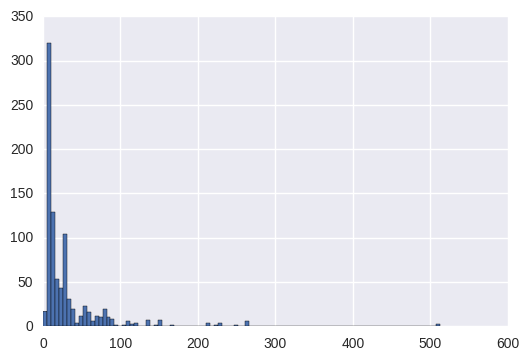

In [33]:
# Distribution of Fare prices
plt.hist(df['Fare'], 100)
plt.show()

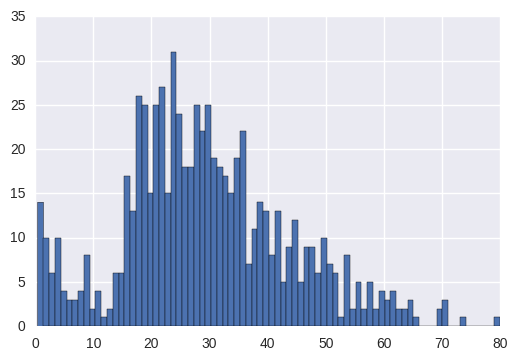

In [34]:
# Distribution of Age of passengers
plt.hist(df['Age'].dropna(), 80)
plt.show()

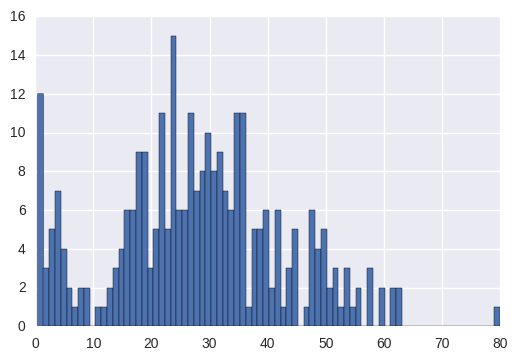

In [35]:
# Distribution of Age of passengers who survived
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), 80)
plt.show()

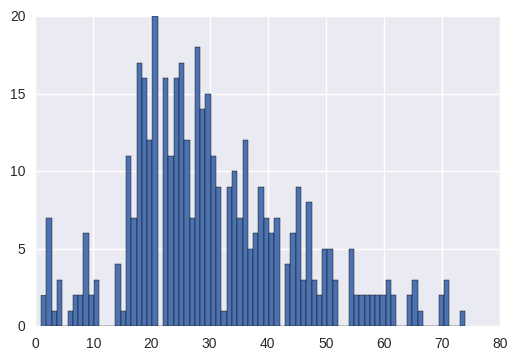

In [36]:
# Distribution of Age of passengers who did not survive
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), 80)
plt.show()

In [37]:
df.corr()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
index,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
PassengerId,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


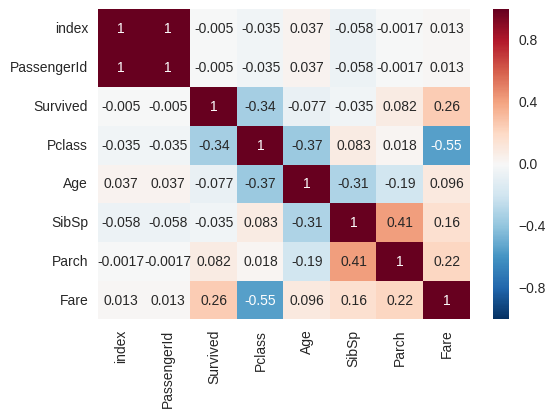

In [38]:
sns.heatmap(df.corr(), annot=True)

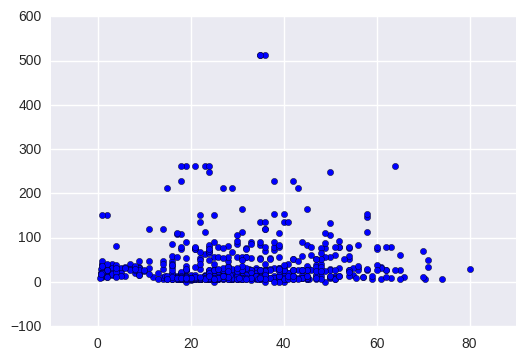

In [39]:
plt.scatter(df['Age'], df['Fare'])

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [40]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df['Pclass'] = df['Pclass'].astype('category')

In [42]:
type(df['Pclass'][0])

numpy.int64

In [43]:
dummies = pd.get_dummies(df[['Sex', 'Embarked', 'Pclass', 'Fare']])
dummies.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [44]:
# The exact number of family members didn't seem to be important when I looked at the data above, but having a family 
# member on board did. So I'll convert these into essentially dummy variables
dummies['SibSp'] = df['SibSp'].apply(lambda x: 1 if x > 0 else 0)
dummies['Parch'] = df['Parch'].apply(lambda x: 1 if x > 0 else 0)

In [45]:
dummies.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp,Parch
0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
1,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
2,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
3,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
4,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0


In [46]:
print dummies['SibSp'].describe()
print dummies['Parch'].describe()

count    891.000000
mean       0.317621
std        0.465813
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: SibSp, dtype: float64
count    891.000000
mean       0.239057
std        0.426747
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Parch, dtype: float64


In [47]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [48]:
filled_ages = df['Age'].fillna('Missing')

In [49]:
filled_ages[0:10]

0         22
1         38
2         26
3         35
4         35
5    Missing
6         54
7          2
8         27
9         14
Name: Age, dtype: object

In [50]:
dummies['Child'] = df['Age'].apply(lambda x: 1 if x < 15 else 0)
dummies['Elderly'] = df['Age'].apply(lambda x: 1 if x > 50 else 0)
dummies['Missing Age'] = filled_ages.apply(lambda x: 1 if x == 'Missing' else 0)

In [51]:
dummies['Child'].value_counts()

0    813
1     78
Name: Child, dtype: int64

In [52]:
dummies['Elderly'].value_counts()

0    827
1     64
Name: Elderly, dtype: int64

In [53]:
dummies['Missing Age'].value_counts()

0    714
1    177
Name: Missing Age, dtype: int64

In [54]:
dummies.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp,Parch,Child,Elderly,Missing Age
0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0
1,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
2,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0
3,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0
4,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0


## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

In [56]:
# Drop one of each sex, pclass, and embarked dummies
features = dummies.drop(['Sex_female', 'Pclass_3', 'Embarked_Q'], axis=1)
y = df['Survived']

features.head()

,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_2,SibSp,Parch,Child,Elderly,Missing Age
0,7.2500,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0
1,71.2833,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0
2,7.9250,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
3,53.1000,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0
4,8.0500,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0


In [57]:
# Note, I tried other values of k from 1-10 (out of 11 features total)
# k=9 had the best results, but was still worse than using the whole thing, as I'll show below
kbest = SelectKBest(k=9)
results_of_kbest9 = kbest.fit_transform(features, y)
print results_of_kbest9
print kbest.scores_

[[  7.25     1.       0.     ...,   1.       0.       0.    ]
 [ 71.2833   0.       1.     ...,   1.       0.       0.    ]
 [  7.925    0.       0.     ...,   0.       0.       0.    ]
 ..., 
 [ 23.45     0.       0.     ...,   1.       1.       0.    ]
 [ 30.       1.       1.     ...,   0.       0.       0.    ]
 [  7.75     1.       0.     ...,   0.       0.       0.    ]]
[  63.03076423  372.4057236    25.895987     22.07546859   79.13640331
    7.81480472   12.09748353   19.74611822   13.65138643    0.46773376
    7.62146075]


In [58]:
logistic_regression_factory = LogisticRegression()

rfe_factory = RFE(estimator=logistic_regression_factory, step=1)

In [59]:
results_of_rfe = rfe_factory.fit_transform(features, y)
results_of_rfe

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [60]:
# # Drop one of each sex, pclass, and embarked dummies
# X = dummies.drop(['Sex_female', 'Pclass_3', 'Embarked_Q'], axis=1)

# X.head()

In [61]:
model_for_kbest_9_columns = LogisticRegression()
model_for_kbest_9_columns.fit(results_of_kbest9, y)
model_for_kbest_9_columns.score(results_of_kbest9, y)

0.80359147025813693

In [62]:
model_for_rfe_columns = LogisticRegression()
model_for_rfe_columns.fit(results_of_rfe, y)
model_for_rfe_columns.score(results_of_rfe, y)

0.78900112233445563

In [63]:
full_honkin_dataframe = LogisticRegression()
full_honkin_dataframe.fit(features, y)
full_honkin_dataframe.score(features, y)

0.80471380471380471

In [64]:
# Using the full honkin dataframe yielded the best results, so I just set X equal to the full list of features
X = features
X.head()

,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_2,SibSp,Parch,Child,Elderly,Missing Age
0,7.2500,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0
1,71.2833,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0
2,7.9250,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
3,53.1000,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0
4,8.0500,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0


#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

In [65]:
y = df['Survived']

#### 3. Conduct the logistic regression

In [66]:
# Testing a simple model to make sure nothing blows up
logit = LogisticRegression()
model = logit.fit(X, y)
predictions = model.predict(X)

print model.score(X, y)

0.804713804714


#### 4. Examine the coefficients to see our correlations

In [67]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

In [68]:
examine_coefficients(logit,X)

,Coefficient,Feature
1,-2.502788,Sex_male
9,-0.668740,Elderly
3,-0.493754,Embarked_S
10,-0.208592,Missing Age
7,-0.208056,Parch
6,-0.184488,SibSp
0,0.001827,Fare
2,0.070438,Embarked_C
5,1.119239,Pclass_2
8,1.174655,Child


#### 6. Test the Model by introducing a *Test* or *Validaton* set 

In [69]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model_tt = logit.fit(X_train, y_train)

In [70]:
examine_coefficients(model_tt, X_train)

,Coefficient,Feature
1,-2.490317,Sex_male
3,-0.517958,Embarked_S
7,-0.340620,Parch
9,-0.294517,Elderly
6,-0.031771,SibSp
0,0.002663,Fare
10,0.114128,Missing Age
2,0.117948,Embarked_C
8,1.103033,Child
5,1.209356,Pclass_2


#### 7. Predict the class labels for the *Test* set

In [71]:
tt_predictions = model_tt.predict(X_test)
tt_predictions[0:5]

array([0, 0, 1, 0, 1])

#### 8. Predict the class probabilities for the *Test* set

In [72]:
tt_proba_predictions = model_tt.predict_proba(X_test)
tt_proba_predictions[0:5]

array([[ 0.66281651,  0.33718349],
       [ 0.65542123,  0.34457877],
       [ 0.32455651,  0.67544349],
       [ 0.85058974,  0.14941026],
       [ 0.32839889,  0.67160111]])

#### 9. Evaluate the *Test* set

In [73]:
accuracy_score(y_test, tt_predictions)

0.78991596638655459

#### 10. Cross validate the test set

In [74]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

# Perform 5-fold cross validation
cv_scores = cross_val_score(logit, X_test, y_test, cv=5)
print "Cross-validated scores:", cv_scores
# Make cross validated predictions
cv_predictions = cross_val_predict(logit, X_test, y_test, cv=5)
cv_accuracy = accuracy_score(y_test, cv_predictions)
print "Cross-Predicted Accuracy:", cv_accuracy

Cross-validated scores: [ 0.78082192  0.74647887  0.8028169   0.8028169   0.77464789]
Cross-Predicted Accuracy: 0.781512605042


#### 11. Check the Classification Report

In [75]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, tt_predictions)
print cls_rep

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       211
          1       0.80      0.64      0.71       146

avg / total       0.79      0.79      0.79       357



#### 12. What do the classification metrics tell us?

Precision tells us what percentage of the results that were labeled 1/0 were correct.

Precision = True Positives / (True Positives + False Positives)

Recall tells us what percentage of the true 1/0 results were correctly identified.

Recall = True Positives / (True Positives + False Negatives)

F1-Score is the harmonic mean of precision and recall. 

Support is simply the number of observations of the labelled class.

#### 13. Check the Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, tt_predictions))

confusion = pd.DataFrame(conmat, index=['Survived', 'Died'],
                         columns=['Predicted Survived','Predicted Died'])

confusion

,Predicted Survived,Predicted Died
Survived,188,23
Died,52,94


In [77]:
TP = confusion.ix['Survived', 'Predicted Survived']
FP = confusion.ix['Died', 'Predicted Survived']
TN = confusion.ix['Died', 'Predicted Died']
FN = confusion.ix['Survived', 'Predicted Died']

zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN])

[('True Positives', 188),
 ('False Positives', 52),
 ('True Negatives', 94),
 ('False Negatives', 23)]

#### 14. What does the Confusion Matrix tell us? 

The Confusion Matrix tells us the exact numbers of True Positives, False Positives, True Negatives, and False Negatives.

#### 15. Plot the ROC curve

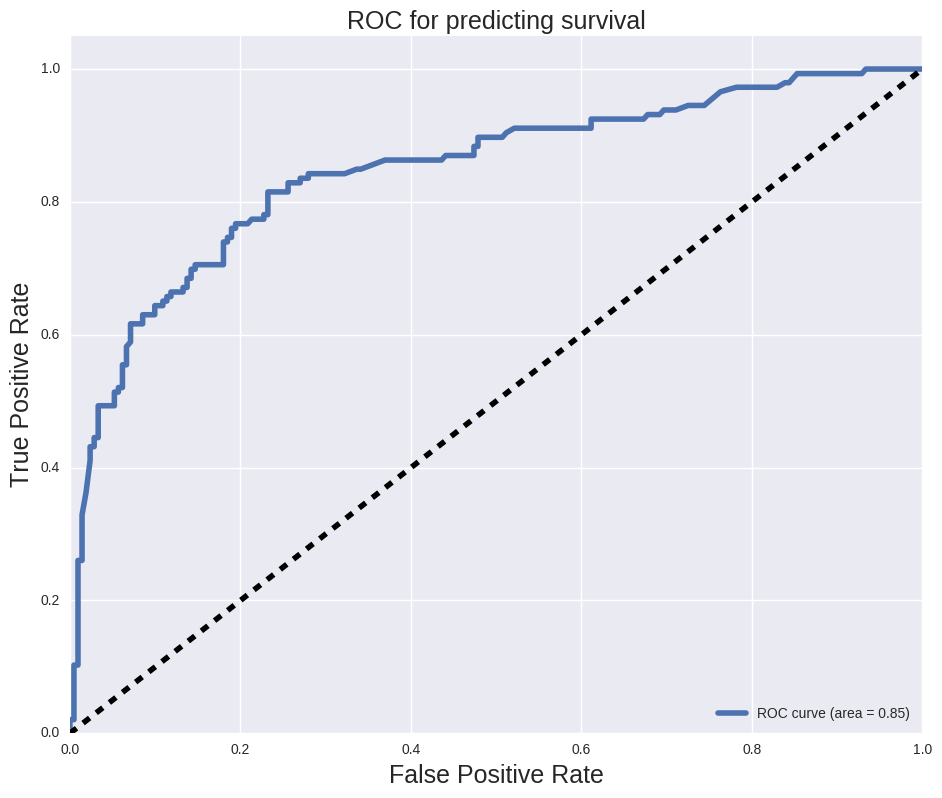

In [78]:
from sklearn.metrics import roc_curve, auc

y_score = logit.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict() # {}

# print roc_curve(y_test, y_score)

FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])


plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for predicting survival', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### 16. What does the ROC curve tell us?

The ROC curve compares the true positive rate and the false positive rate. It shows how the rate of each would change if the threshold for assigning a positive was chagned in the model. A higher area under the curve represents a higher ratio of true positives to false positives. An area under the curve closer to 1 represents a higher quality classification model.

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [79]:
# Grid search parameters
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear'],
}

In [80]:
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(estimator=logit, param_grid=logreg_parameters, cv=5)
grid_model = grid.fit(X, y)
grid_predictions = grid_model.predict(X)
print grid

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...6e+00,   4.29193e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

In [81]:
#Summarize the Results of the Grid Search
print 'Best score:', grid.best_score_
print 'Type of regularization used:', grid.best_estimator_.penalty
print 'Best C value:', grid.best_estimator_.C

Best score: 0.795735129068
Type of regularization used: l1
Best C value: 1.84206996933


In [82]:
logit_optimal = LogisticRegression(penalty='l2', C=1.84206996933, solver='liblinear')
logit_optimal_model = logit_optimal.fit(X, y)
logit_optimal_predictions = logit_optimal_model.predict(X)

print logit_optimal_model.score(X, y)

0.801346801347


In [83]:
def examine_grid_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.best_estimator_.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

In [84]:
examine_grid_coefficients(grid, X)

,Coefficient,Feature
1,-2.593569,Sex_male
9,-0.715002,Elderly
3,-0.543643,Embarked_S
7,-0.219246,Parch
6,-0.193544,SibSp
10,-0.184316,Missing Age
0,0.001347,Fare
5,1.200209,Pclass_2
8,1.279053,Child
4,1.996916,Pclass_1


In [85]:
examine_coefficients(logit_optimal, X)

,Coefficient,Feature
1,-2.563694,Sex_male
9,-0.723678,Elderly
3,-0.538729,Embarked_S
7,-0.233483,Parch
10,-0.219690,Missing Age
6,-0.202450,SibSp
0,0.001554,Fare
2,0.030167,Embarked_C
5,1.172049,Pclass_2
8,1.256433,Child


In [86]:
grid_conmat = np.array(confusion_matrix(y, grid_predictions))

grid_confusion = pd.DataFrame(grid_conmat, index=['Survived', 'Died'],
                         columns=['Predicted Survived','Predicted Died'])

grid_confusion

,Predicted Survived,Predicted Died
Survived,471,78
Died,102,240


In [87]:
logit_conmat = np.array(confusion_matrix(y, logit_optimal_predictions))

logit_confusion = pd.DataFrame(logit_conmat, index=['Survived', 'Died'],
                         columns=['Predicted Survived','Predicted Died'])

logit_confusion

,Predicted Survived,Predicted Died
Survived,474,75
Died,102,240


#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

L1 regularization penalizes the sum of the absolute value of the coefficients, while L2 regularization penalizes the sum of the squares of the coefficients. Lasso regularization can also zero out some of the coefficients, which allows it to perform a form of feature selection as well.

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

Ridge and Lasso penalties help prevent overfitting by penalizing the magnitude of coefficients. Because Lasso regularization can also set some coefficients to zero, it is most useful when there are a large number of features.

#### 5. [BONUS] Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

The C parameter affects how strongly the coefficients are punished. In sklearn's LogisticRegression function, C is the inverse of the regularization parameter, so smaller C values will result in stronger regularization, which will penalize the magnitude of the coefficients more than a higher value of C.

#### 6.a. [BONUS] You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

In [88]:
# Get the predicted probability vector
Y_pp = pd.DataFrame(grid.predict_proba(X), columns=['class_0_pp','class_1_pp'])
print Y_pp.iloc[0:10]

   class_0_pp  class_1_pp
0    0.929967    0.070033
1    0.066969    0.933031
2    0.449711    0.550289
3    0.112439    0.887561
4    0.916182    0.083818
5    0.884084    0.115916
6    0.740895    0.259105
7    0.818728    0.181272
8    0.503271    0.496729
9    0.044744    0.955256


In [89]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.90 else 0 for x in Y_pp.class_1_pp.values]
print Y_pp.iloc[0:10]

   class_0_pp  class_1_pp  pred_class_thresh10
0    0.929967    0.070033                    0
1    0.066969    0.933031                    1
2    0.449711    0.550289                    0
3    0.112439    0.887561                    0
4    0.916182    0.083818                    0
5    0.884084    0.115916                    0
6    0.740895    0.259105                    0
7    0.818728    0.181272                    0
8    0.503271    0.496729                    0
9    0.044744    0.955256                    1


In [90]:
conmat_90 = np.array(confusion_matrix(y, Y_pp.pred_class_thresh10.values, labels=[1,0]))

confusion_90 = pd.DataFrame(conmat_90, index=['Survived', 'Died'],
                            columns=['Predicted Survived','Predicted Died'])

confusion_90

,Predicted Survived,Predicted Died
Survived,65,277
Died,2,547


Setting the threshold to 90% massively increases the number of False Negatives, while massively decreasing the number of False Positives and True Positives. 90% is such a high threshold that it significantly decreases the overall performance of the model.

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

In [92]:
knn_parameters = {
    'n_neighbors':range(1,11),
    'weights':['uniform', 'distance']
}

In [93]:
knn_grid = GridSearchCV(estimator=neigh, param_grid=knn_parameters, cv=5)
knn_grid_model = knn_grid.fit(X, y)
knn_grid_predictions = knn_grid_model.predict(X)
print knn_grid

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

In [94]:
print 'Number of neighbors:', knn_grid.best_estimator_.n_neighbors
print 'Weights:', knn_grid.best_estimator_.weights
print 'Best Score:', knn_grid.best_score_
knn_grid.grid_scores_

Number of neighbors: 8
Weights: distance
Best Score: 0.777777777778


[mean: 0.70595, std: 0.06901, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.70595, std: 0.06901, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.73288, std: 0.02406, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.74747, std: 0.03458, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.75870, std: 0.02273, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.75758, std: 0.02397, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.73064, std: 0.02552, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.75982, std: 0.02596, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.74972, std: 0.04088, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.76431, std: 0.04043, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.73850, std: 0.03795, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.76431, std: 0.04237, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.76207, std: 0.04748, para

#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### [BONUS] Why?

The bias increases as k increases, and the variance decreases as k increases. A higher k will decrease the variance because the average difference between the nearest neighbors will be smaller. A higher k value will increase the bias, because the model will be more overfit to the specific set of data.

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

Logistic regression can predict probabilities to measure the confidence of the predictions, whereas kNN just predicts the labels. If you want to tweak the confidence threshold to minimize either false negatives or false positives, it would be more useful to use logistic regression.

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

In [95]:
knn_optimal = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn_optimal_model = knn_optimal.fit(X, y)
knn_optimal_predictions = knn_optimal_model.predict(X)

print knn_optimal_model.score(X, y)
# This is reall high for some reason, maybe because it's more overfit?

0.94051627385


#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

In [96]:
knn_conmat = np.array(confusion_matrix(y, knn_optimal_predictions))

knn_confusion = pd.DataFrame(knn_conmat, index=['Survived', 'Died'],
                         columns=['Predicted Survived','Predicted Died'])

knn_confusion

,Predicted Survived,Predicted Died
Survived,541,8
Died,45,297


In [97]:
# Logistic confusion matrix for reference
logit_confusion

,Predicted Survived,Predicted Died
Survived,474,75
Died,102,240


When looking at the confusion matrix, the kNN model performs a lot better, with less false positives and false negatives. However I think it's probably overfit, because the score when I fit the optimal kNN model was so much higher than the GridSearchCV kNN score.

#### 7. [BONUS] Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

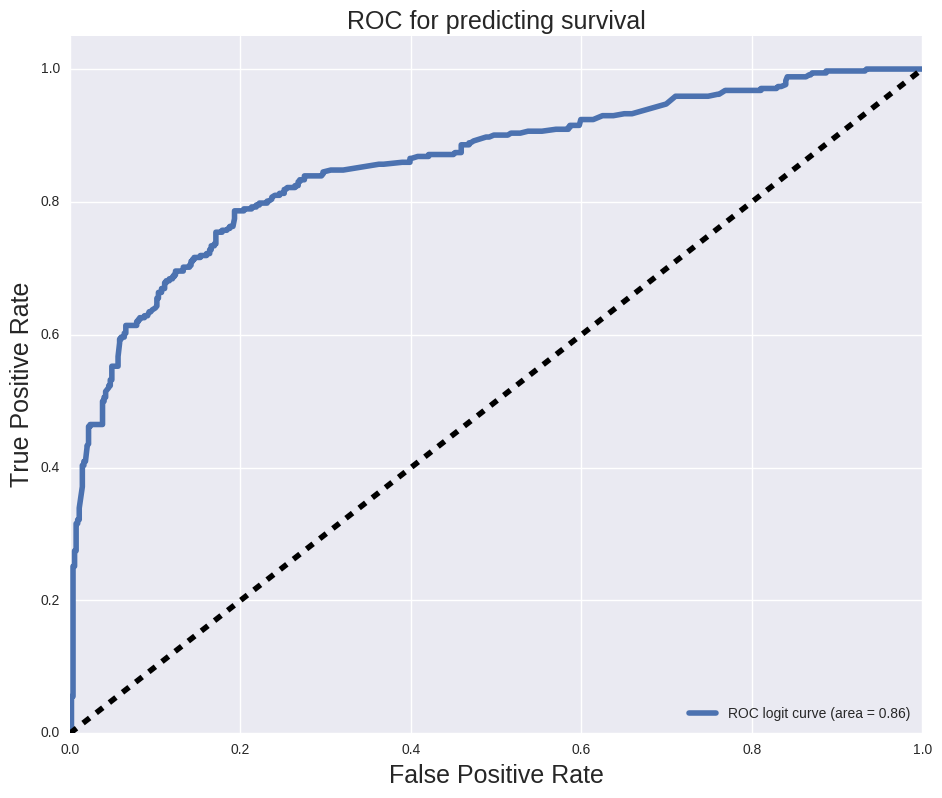

In [98]:
# I couldn't figure out how to plot the ROC curve for the kNN model. I forgot to write down what you said when I asked
# about how to do it manually, and didn't find anything useful by googling it

# So here is just the ROC curve for the optimized Logistic Regression model

y_score = logit_optimal.decision_function(X)
# knn_y_score = knn_grid.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict() # {}

# print roc_curve(y_test, y_score)

FPR[1], TPR[1], _ = roc_curve(y, y_score)
# FPR[2], TPR[2], _ = roc_curve(y_test, knn_y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])
# ROC_AUC[2] = auc(FPR[2], TPR[2])


plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC logit curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
# plt.plot(FPR[2], TPR[2], label='ROC knn curve (area = %0.2f)' % ROC_AUC[2], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for predicting survival', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Part 7: [BONUS] Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

In [99]:
grid2 = GridSearchCV(estimator=logit, param_grid=logreg_parameters, scoring='average_precision', cv=5)
grid_model2 = grid2.fit(X, y)
grid_predictions2 = grid_model2.predict(X)
print grid2

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...6e+00,   4.29193e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring='average_precision',
       verbose=0)


#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

In [100]:
#Summarize the Results of the Grid Search
print 'Best score:', grid2.best_score_
print 'Type of regularization used:', grid2.best_estimator_.penalty
print 'Best C value:', grid2.best_estimator_.C

Best score: 0.804250489662
Type of regularization used: l2
Best C value: 0.449843266897


#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

In [101]:
# Original logit grid confusion matrix
grid_confusion

,Predicted Survived,Predicted Died
Survived,471,78
Died,102,240


In [102]:
grid_conmat2 = np.array(confusion_matrix(y, grid_predictions2))

grid_confusion2 = pd.DataFrame(grid_conmat2, index=['Survived', 'Died'],
                         columns=['Predicted Survived','Predicted Died'])

grid_confusion2

,Predicted Survived,Predicted Died
Survived,475,74
Died,101,241


The precision optimized model is very very slightly different from the accuracy optimized model, with one more correct positive and negative result, and one less false positive/negative.

#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

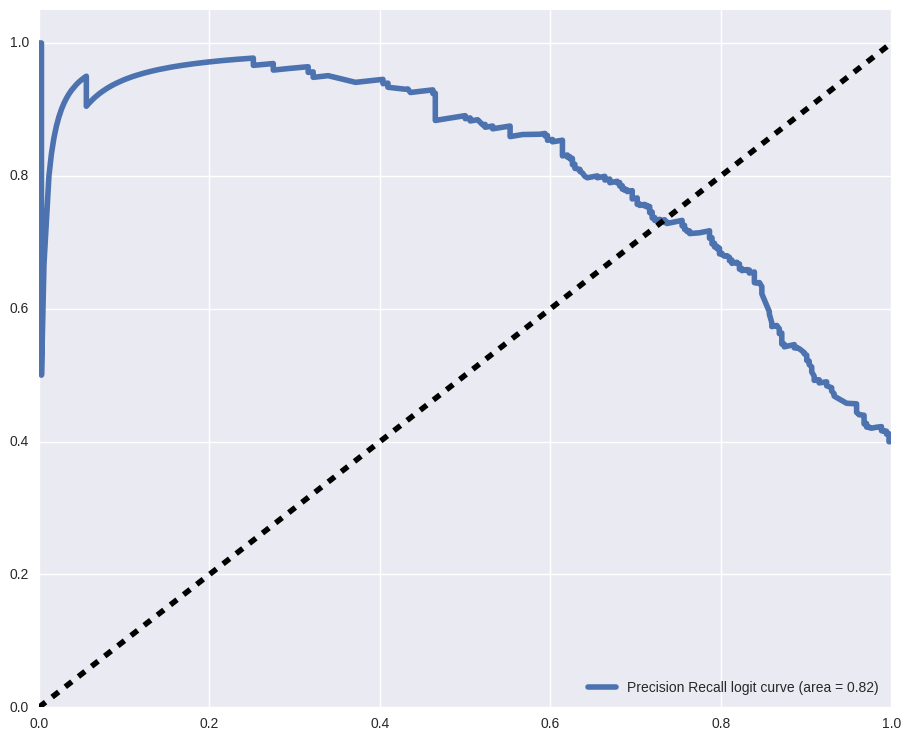

In [103]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = logit_optimal_model.decision_function(X)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
precision[1], recall[1], _ = precision_recall_curve(y, y_score)
average_precision[1] = average_precision_score(y, y_score)

plt.figure(figsize=[11,9])
plt.plot(recall[1], precision[1], label='Precision Recall logit curve (area = %0.2f)' % average_precision[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=18)
# plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('ROC for predicting survival', fontsize=18)
plt.legend(loc="lower right")
plt.show()


# Well that's probably not right...

## Random Forest

In [146]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [151]:
rfc = RandomForestClassifier()

params = {
    'random_forest': {
        "n_estimators": [10, 100, 1000],
        "max_depth": [3, None],
        "max_features": [0.25, 0.5, 0.75, 1.0],
        "bootstrap": [True, False],
        "criterion": ["gini", "entropy"]
    }
}

In [152]:
results = {}

def evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    grid = GridSearchCV(model, param_grid=params[model_name], cv=3)
    grid.fit(X_train, y_train)
    predictions = grid.predict(X_test)
    print 'Model tested:', model_name
    print grid.best_params_
    print grid.score(X_train, y_train)
    print grid.score(X_test, y_test)
    print pd.DataFrame(confusion_matrix(y_test, predictions), index=['predicted_high_rating', 'predicted_not_high_rating'], columns=['is_high_rating', 'not_high_rating'])
    print classification_report(y_test, predictions)
#     plt.scatter(y_test, predictions)
#     plt.xlabel('True Values')
#     plt.ylabel('Predictions')
#     plt.show()
    results.update({model_name: grid.score(X_test, y_test)})

In [154]:
evaluate_model(X_train, X_test, y_train, y_test, rfc, 'random_forest')

Model tested: random_forest
{'max_features': 0.5, 'n_estimators': 1000, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None}
0.944610778443
0.829596412556
                           is_high_rating  not_high_rating
predicted_high_rating                 116               14
predicted_not_high_rating              24               69
             precision    recall  f1-score   support

          0       0.83      0.89      0.86       130
          1       0.83      0.74      0.78        93

avg / total       0.83      0.83      0.83       223



In [156]:
best_rf = RandomForestClassifier(max_features=0.5, n_estimators=1000, bootstrap=True, criterion='gini', max_depth=None)
best_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Kaggle submission stuff

In [157]:
test_df = pd.read_csv('../../data/test.csv')
print test_df.shape
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [159]:
test_df['Pclass'] = test_df['Pclass'].astype('category')

In [160]:
type(test_df['Pclass'][0])

numpy.int64

In [161]:
test_dummies = pd.get_dummies(test_df[['Sex', 'Embarked', 'Pclass', 'Fare']])
test_dummies.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [162]:
# The exact number of family members didn't seem to be important when I looked at the data above, but having a family 
# member on board did. So I'll convert these into essentially dummy variables
test_dummies['SibSp'] = test_df['SibSp'].apply(lambda x: 1 if x > 0 else 0)
test_dummies['Parch'] = test_df['Parch'].apply(lambda x: 1 if x > 0 else 0)

In [163]:
test_dummies.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp,Parch
0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
2,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
3,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1


In [164]:
print test_dummies['SibSp'].describe()
print test_dummies['Parch'].describe()

count    418.000000
mean       0.322967
std        0.468170
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: SibSp, dtype: float64
count    418.000000
mean       0.224880
std        0.418004
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Parch, dtype: float64


In [165]:
test_df['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [166]:
test_filled_ages = test_df['Age'].fillna('Missing')

In [167]:
test_filled_ages[0:10]

0    34.5
1      47
2      62
3      27
4      22
5      14
6      30
7      26
8      18
9      21
Name: Age, dtype: object

In [168]:
test_dummies['Child'] = test_df['Age'].apply(lambda x: 1 if x < 15 else 0)
test_dummies['Elderly'] = test_df['Age'].apply(lambda x: 1 if x > 50 else 0)
test_dummies['Missing Age'] = test_filled_ages.apply(lambda x: 1 if x == 'Missing' else 0)

In [169]:
test_dummies['Child'].value_counts()

0    387
1     31
Name: Child, dtype: int64

In [170]:
test_dummies['Elderly'].value_counts()

0    387
1     31
Name: Elderly, dtype: int64

In [171]:
test_dummies['Missing Age'].value_counts()

0    332
1     86
Name: Missing Age, dtype: int64

In [172]:
test_dummies.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp,Parch,Child,Elderly,Missing Age
0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0
1,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0
2,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,1,0
3,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0
4,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0,0,0


In [173]:
# Drop one of each sex, pclass, and embarked dummies
test_features = test_dummies.drop(['Sex_female', 'Pclass_3', 'Embarked_Q'], axis=1)

test_features.head()

,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_2,SibSp,Parch,Child,Elderly,Missing Age
0,7.8292,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,7.0000,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
2,9.6875,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0
3,8.6625,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0
4,12.2875,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0


In [174]:
# # Note, I tried other values of k from 1-10 (out of 11 features total)
# # k=9 had the best results, but was still worse than using the whole thing, as I'll show below
# kbest = SelectKBest(k=9)
# results_of_kbest9 = kbest.fit_transform(features, y)
# print results_of_kbest9
# print kbest.scores_

In [175]:
# logistic_regression_factory = LogisticRegression()

# rfe_factory = RFE(estimator=logistic_regression_factory, step=1)

In [176]:
# results_of_rfe = rfe_factory.fit_transform(features, y)
# results_of_rfe

In [177]:
# # Drop one of each sex, pclass, and embarked dummies
# X = dummies.drop(['Sex_female', 'Pclass_3', 'Embarked_Q'], axis=1)

# X.head()

In [178]:
# model_for_kbest_9_columns = LogisticRegression()
# model_for_kbest_9_columns.fit(results_of_kbest9, y)
# model_for_kbest_9_columns.score(results_of_kbest9, y)

In [179]:
# model_for_rfe_columns = LogisticRegression()
# model_for_rfe_columns.fit(results_of_rfe, y)
# model_for_rfe_columns.score(results_of_rfe, y)

In [180]:
# full_honkin_dataframe = LogisticRegression()
# full_honkin_dataframe.fit(features, y)
# full_honkin_dataframe.score(features, y)

In [181]:
# Using the full honkin dataframe yielded the best results, so I just set X equal to the full list of features
test_X = test_features
test_X.head()

,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_2,SibSp,Parch,Child,Elderly,Missing Age
0,7.8292,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,7.0000,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
2,9.6875,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0
3,8.6625,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0
4,12.2875,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0


In [182]:
test_X.fillna(test_X['Fare'].mean(), inplace=True)

In [183]:
test_X.isnull().any()

Fare           False
Sex_male       False
Embarked_C     False
Embarked_S     False
Pclass_1       False
Pclass_2       False
SibSp          False
Parch          False
Child          False
Elderly        False
Missing Age    False
dtype: bool

In [185]:
test_predictions = best_rf.predict(test_X)

In [186]:
print test_predictions.mean()
print test_predictions.sum()
test_predictions

0.373205741627
156


array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [188]:
test_proba_predictions = best_rf.predict_proba(test_X)
test_proba_predictions[0:10]

array([[ 0.78800112,  0.21199888],
       [ 0.27166667,  0.72833333],
       [ 0.85097256,  0.14902744],
       [ 0.87673167,  0.12326833],
       [ 0.605     ,  0.395     ],
       [ 0.427     ,  0.573     ],
       [ 0.35607222,  0.64392778],
       [ 0.97745714,  0.02254286],
       [ 0.07975159,  0.92024841],
       [ 0.98529286,  0.01470714]])

In [189]:
knn_test_predictions = knn_optimal.predict(test_X)

In [190]:
knn_test_predictions.mean()

0.35885167464114831

In [191]:
export = pd.DataFrame(test_df['PassengerId'])

In [192]:
preds = pd.DataFrame(test_predictions)

In [193]:
export = export.join(preds)
export.columns = ['PassengerId', 'Survived']
export.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [194]:
export.to_csv('../../data/titanic_export.csv', index=False)